+ On average, females tend to purchase more items and spend more money than males.
+ Unmarried individuals tend to purchase more items than their married counterparts.
+ People working in the IT sector were the biggest spenders compared to any other occupation.
+ The age group between 26 to 35 tends to spend more money on their purchases compared to any other age group.
+ Compared to other product categories, people tend to spend more money on food and clothing.

# Import Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV  file

In [10]:
file_path = r"C:\Users\prate\Music\Data\Sales Data\Diwali Sales Data.csv"

In [11]:
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Size of data

In [12]:
data.shape

(11251, 15)

# First 5 rows of the DataFrame

In [13]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Last 5 rows of the DataFrame

In [14]:
data.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Data Cleaning

In [16]:
# Drop blank column
data.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [17]:
# Check null value
pd.isnull(data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [18]:
# drop null value
data.dropna(inplace = True)

In [19]:
# Change data type
data['Amount'] = data['Amount'].astype('int')

In [20]:
data['Amount'].dtypes

dtype('int32')

In [21]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [22]:
# Change the column name
data.rename(columns = {'Marital_Status' : 'Shaadi'}, inplace = True)

In [23]:
data[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Explore Data Analysis(EDA)

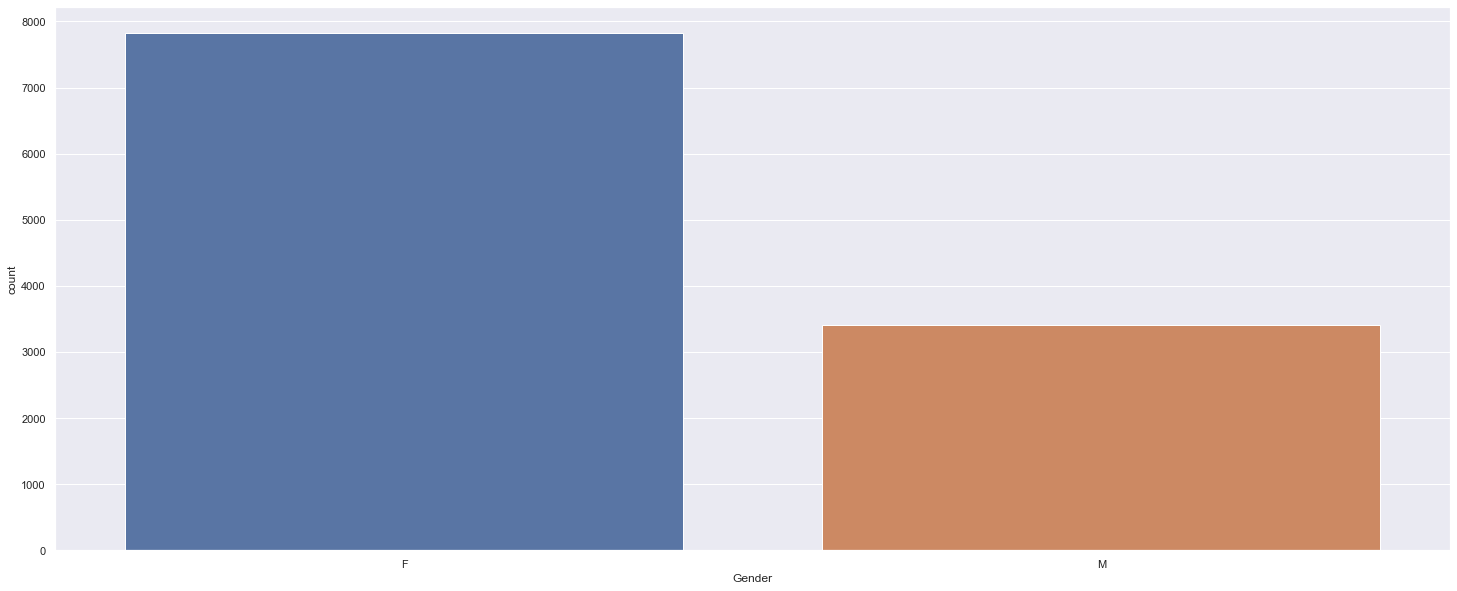

In [24]:
ax = sns.countplot(x='Gender', data=data)

Females purchase more items than males.

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

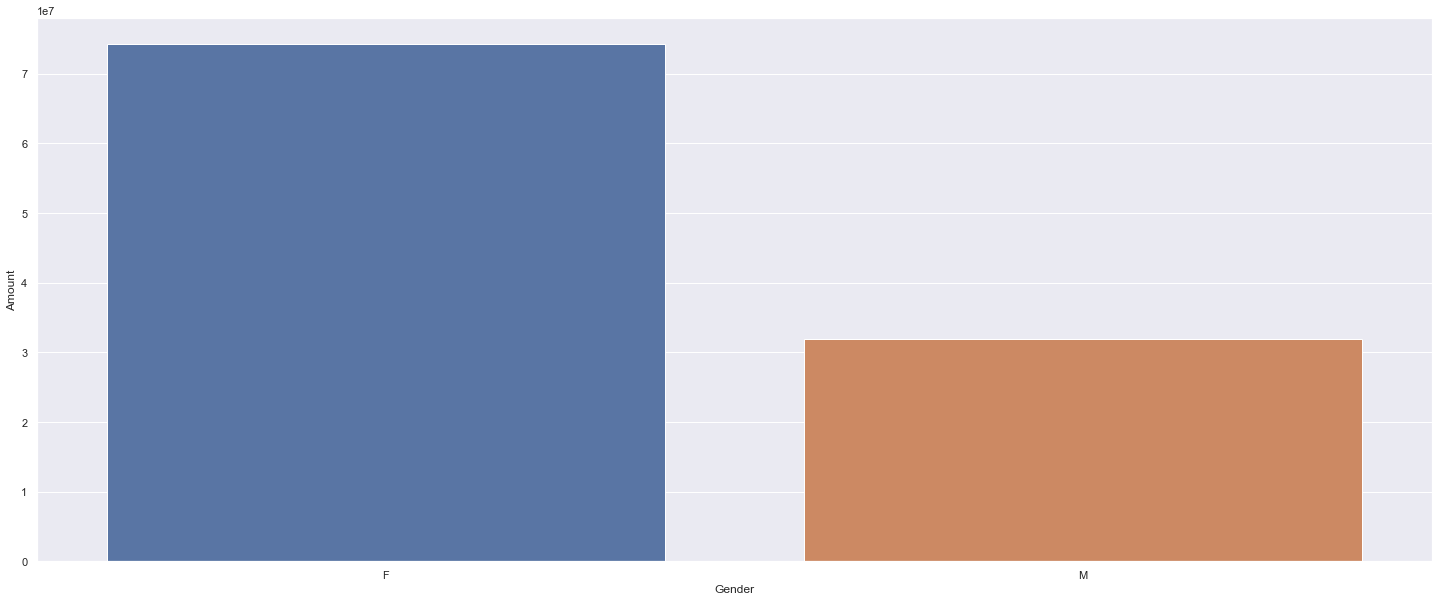

In [25]:
sales_gen = data.groupby(['Gender'] , as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

Females spend more amount than males.

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

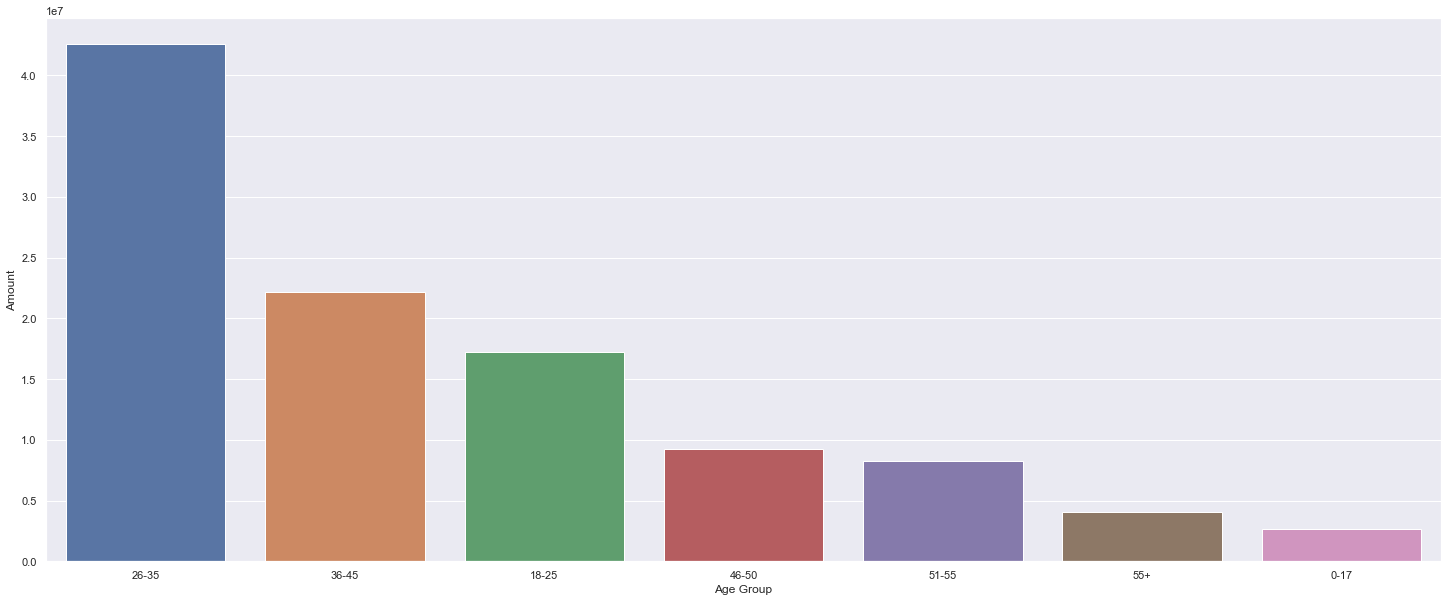

In [26]:
sales_age = data.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

People between the ages of 26 to 35 purchase more items compared to any other age group, while those aged 0 to 17 are the least purchasing age group.

<AxesSubplot:xlabel='Age Group', ylabel='count'>

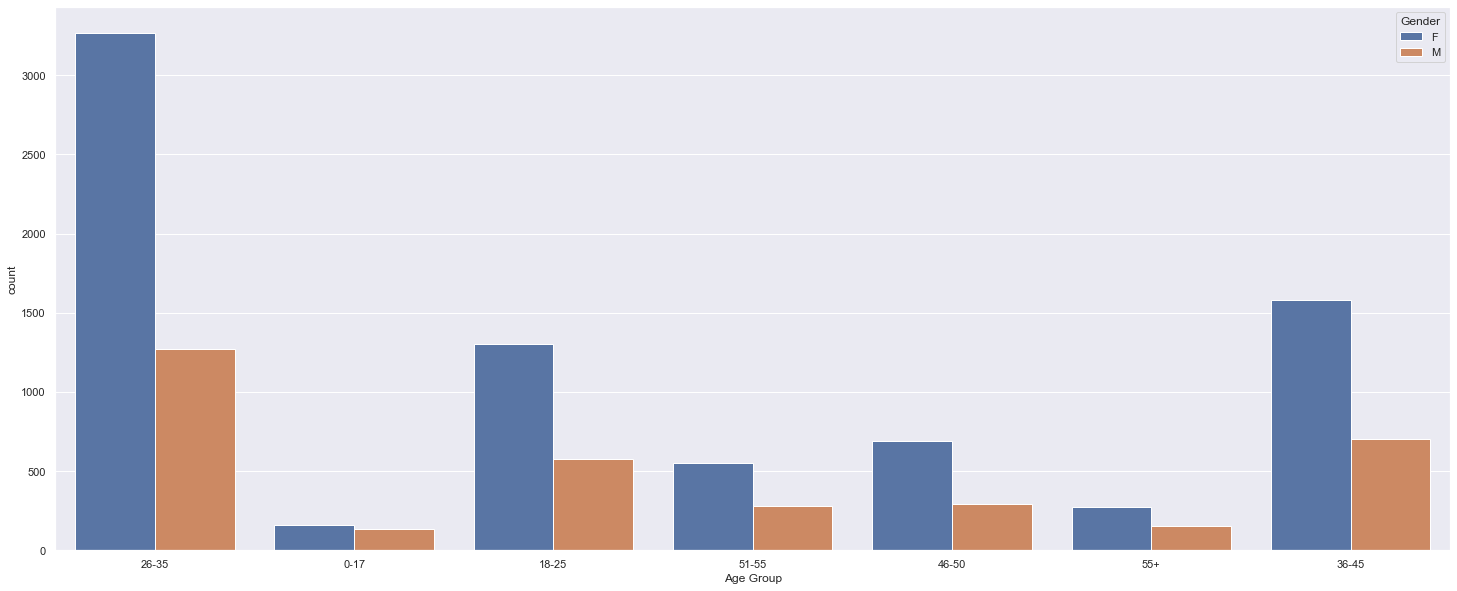

In [27]:
sns.countplot(data = data, x = 'Age Group', hue = 'Gender')

People between the ages of 26 to 35 purchase more items compared to any other age group, and within this age group, females purchase more than males.

<AxesSubplot:xlabel='State', ylabel='Orders'>

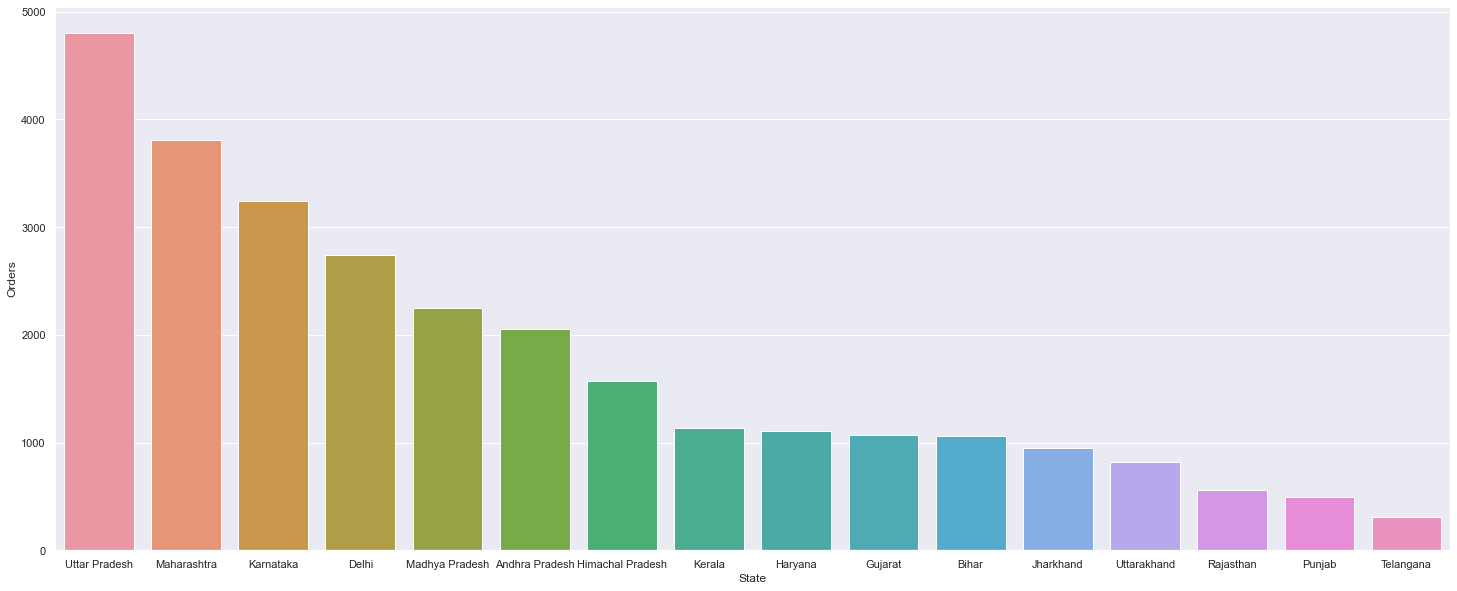

In [28]:
# Total number of Order from top 10 state

sales_state = data.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)
sns.set(rc = {'figure.figsize':(25,10)})
sns.barplot(data = sales_state, x = 'State', y = 'Orders')


People from Uttar Pradesh placed the highest number of orders.

<AxesSubplot:xlabel='State', ylabel='Amount'>

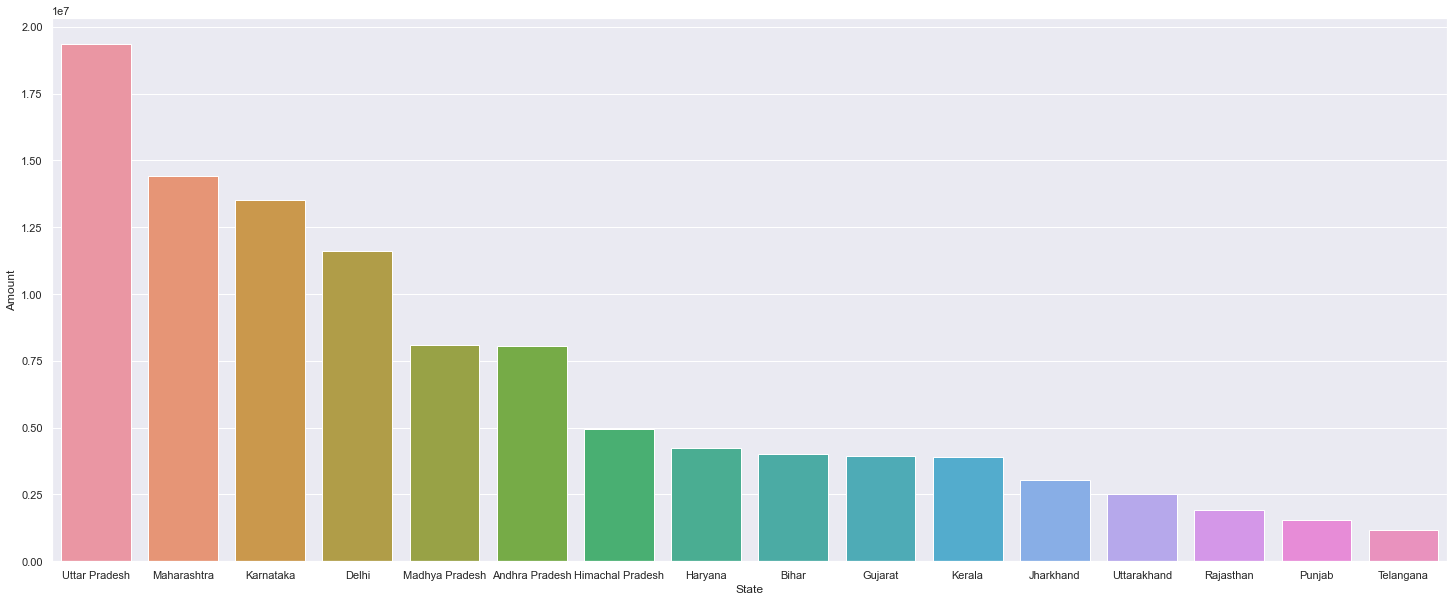

In [29]:
# Total sale from top 10 state

sales_state = data.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize':(25,10)})
sns.barplot(data = sales_state, x = 'State', y = 'Amount')

People from Uttar Pradesh placed the highest number of orders.

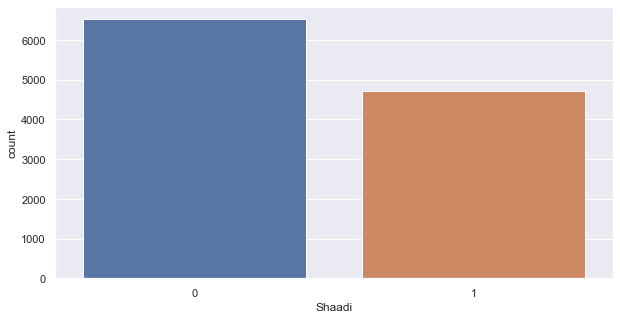

In [44]:
ax = sns.countplot(x='Shaadi', data=data)
sns.set(rc = {'figure.figsize':(7,5)})

Unmarried people purchase more items than married people.

<AxesSubplot:xlabel='Shaadi', ylabel='Amount'>

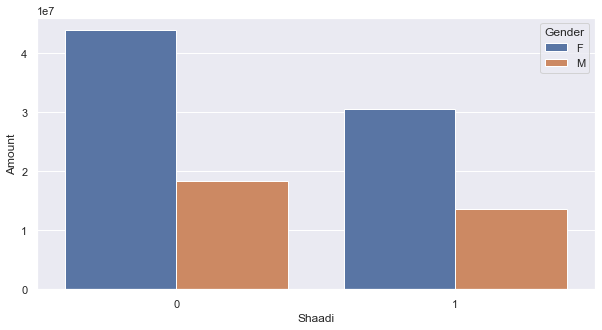

In [43]:
sales_state = data.groupby(['Shaadi', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(data = sales_state, x = 'Shaadi', y = 'Amount', hue = 'Gender')

Unmarried Female purchase more items than married Female.

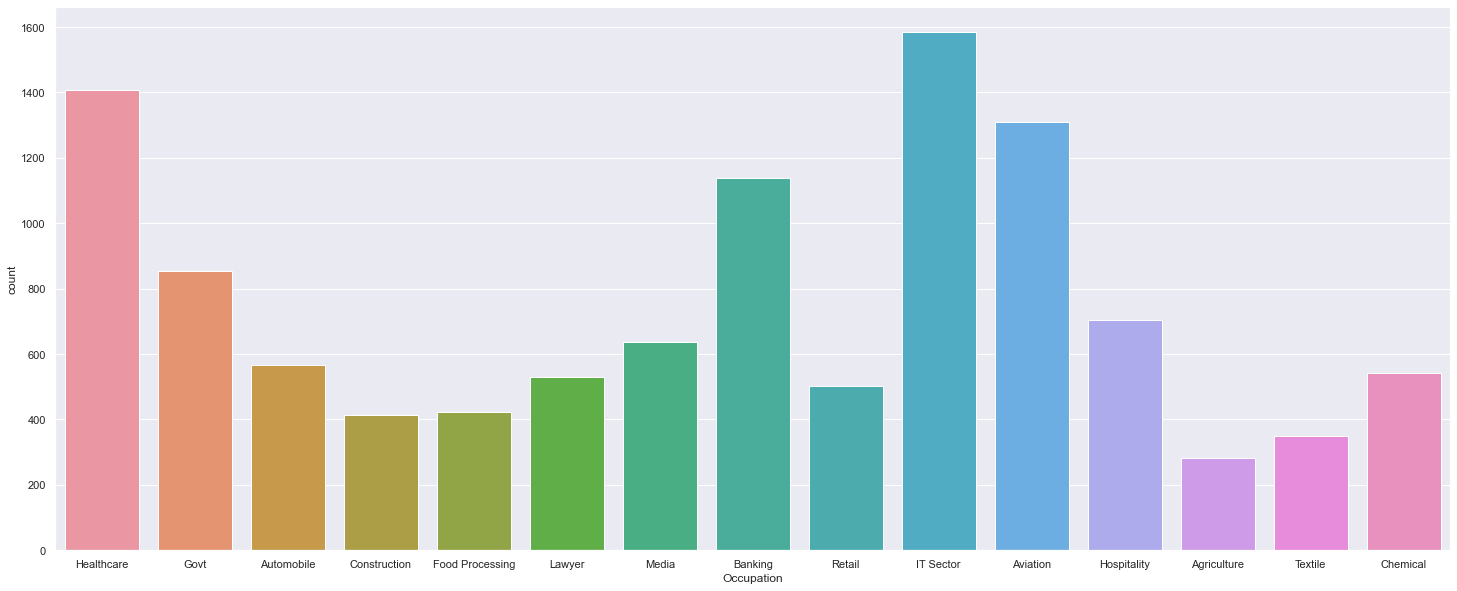

In [41]:
ax = sns.countplot(x='Occupation', data=data)
sns.set(rc = {'figure.figsize':(25,20)})

People who work in the IT field purchase more items compared to those who work in other fields.

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

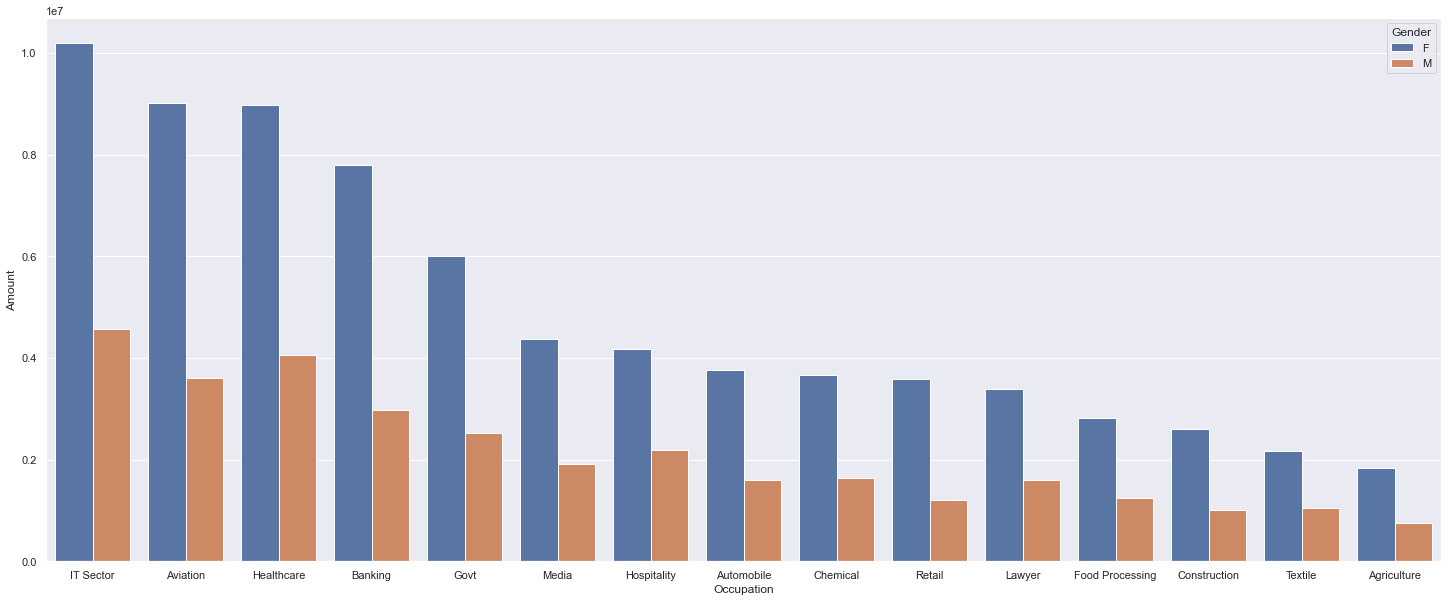

In [33]:
sales_state = data.groupby(['Occupation', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize':(25,10)})
sns.barplot(data = sales_state, x = 'Occupation', y = 'Amount', hue = 'Gender')

Females who work in the IT field spend more money on purchasing compared to females who work in any other field

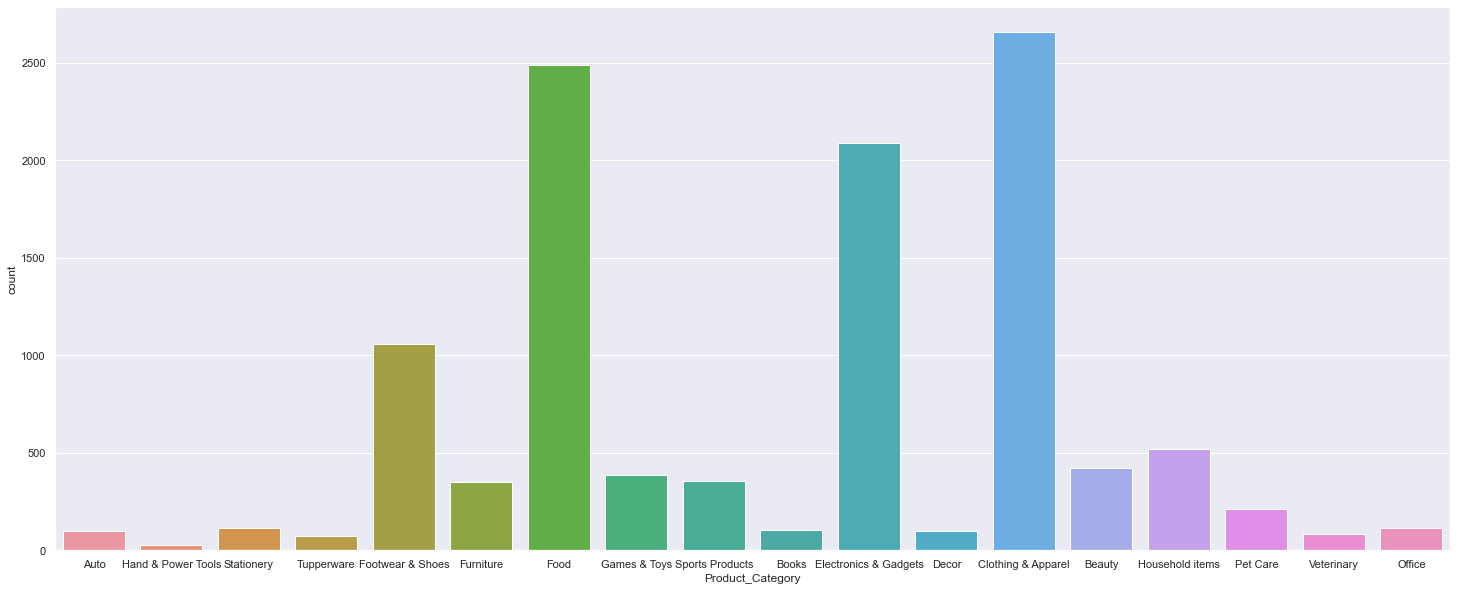

In [34]:
ax = sns.countplot(x='Product_Category', data=data)
sns.set(rc = {'figure.figsize':(25,10)})

Clothes are the most purchased item.

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

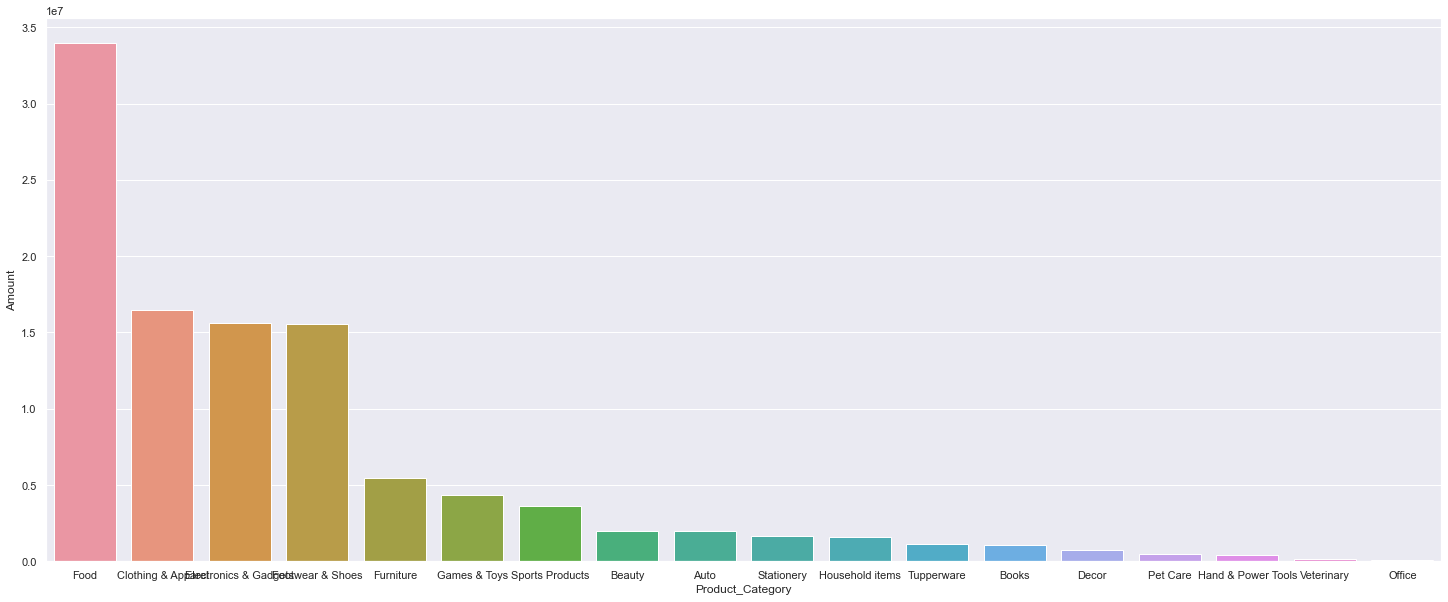

In [35]:
sales_state = data.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize':(25,10)})
sns.barplot(data = sales_state, x = 'Product_Category', y = 'Amount')

People spend the most money on food.

<AxesSubplot:xlabel='Product_Category', ylabel='Orders'>

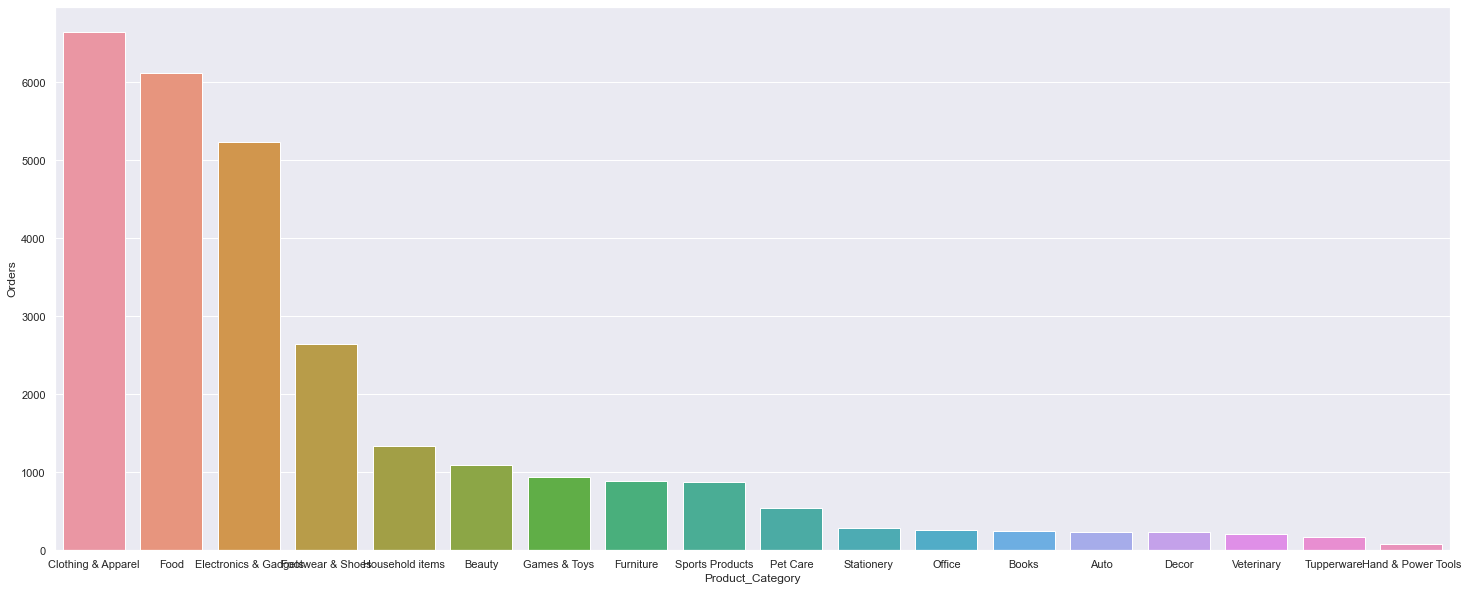

In [36]:
sales_state = data.groupby(['Product_Category'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)
sns.set(rc = {'figure.figsize':(25,10)})
sns.barplot(data = sales_state, x = 'Product_Category', y = 'Orders')

The highest number of orders are for clothes.